In [6]:
# Sentiment Analysis
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the cleaned data
df = pd.read_csv('../enron_emails_cleaned.csv')

In [8]:
# praeparing the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
# Save `content` column as a string
text=df['Content'].astype(str)

In [10]:
df['sentiment scores'] = [analyzer.polarity_scores(message) for message in text]
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month,sentiment scores
119838,2000-07-24 14:02:00+00:00,mjones7@txu.com,"cstone1@txu.com, ggreen2@txu.com, timpowell@tx...","Enron / HPL Actuals for July 21 - 23, 2000",Melissa Jones,Charlie Stone,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,discussion threads,Farmer-D,dfarmer.nsf,"july 21, 2000 teco tap 40.000 / hpl iferc ls h...",farmer-d,2000,7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
104199,2001-05-23 14:35:00+00:00,showard@agsk.com,dcweiner@hahnlaw.com,McConville,showard,dcweiner,\Richard_Sanders_Oct2001\Notes Folders\Nsm,nsm,Sanders-R,rsanders.nsf,"dave, kevin mcconville was deposed yesterday i...",sanders-r,2001,5,"{'neg': 0.029, 'neu': 0.906, 'pos': 0.065, 'co..."
86137,2001-01-08 15:17:00+00:00,chris.germany@enron.com,"joann.collins@enron.com, alvin.thompson@enron.com",New Power deals,Chris Germany,Joann Collins Alvin Thompson,\Chris_Germany_Jun2001\Notes Folders\All docum...,all documents,Germany-C,cgerman.nsf,i extended deal 559947 (pool sale) thru the 31...,germany-c,2001,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
62219,2000-08-02 17:36:00+00:00,mike.mcconnell@enron.com,jeffrey.mcmahon@enron.com,Acta DASH,Mike McConnell,Jeffrey McMahon,\Mark_McConnell_June2001\Notes Folders\All doc...,all documents,MCCONNELL-M,mmcconn.nsf,forwarded by mike mcconnell/hou/ect on 08/02/2...,mcconnell-m,2000,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
362626,2000-09-28 19:07:00+00:00,don.miller@enron.com,benjamin.rogers@enron.com,"Energy Financing Company, LLC",Don Miller,Benjamin Rogers,\Benjamin_Rogers_Dec2000_2\Notes Folders\Discu...,discussion threads,Rogers-B,brogers.nsf,forwarded by don miller/hou/ect on 09/28/2000 ...,rogers-b,2000,9,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp..."


In [11]:
#split based on time
df['Date'] = pd.to_datetime(df['Date'])
#choose a time
split_year=1999
split_month=1

time1_data=df[(df["Year"]<split_year)|((df['Year']==split_year) & (df["Month"]<split_month))]
time2_data=df[(df["Year"]>split_year)|((df['Year']==split_year) & (df["Month"]>=split_month))]


In [12]:
time1_data.sample(5)


,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month,sentiment scores
225513,1980-01-01 00:00:00+00:00,barry.tycholiz@enron.com,fred.lagastra@enron.com,Whispering Pines -,Barry Tycholiz,Fred lagastra,\Barry_Tycholiz_Nov2001\Notes Folders\All docu...,all documents,TYCHOLIZ-B,btychol.nsf,"fred, sorry, i am going to cancel out on you t...",tycholiz-b,1980,1,"{'neg': 0.065, 'neu': 0.803, 'pos': 0.133, 'co..."
125173,1980-01-01 00:00:00+00:00,daren.farmer@enron.com,sally.beck@enron.com,Thanks.,Daren J Farmer,Sally Beck,\Darren_Farmer_Dec2000\Notes Folders\All docum...,all documents,Farmer-D,dfarmer.nsf,"sally, i wanted to thank you for the tickets t...",farmer-d,1980,1,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp..."
194076,1998-11-19 18:58:00+00:00,mark.taylor@enron.com,anita.fam@enron.com,LNG hedging for China,Mark ECT Legal Taylor,Anita Fam,\Mark_Taylor _Dec_2000\Notes Folders\Sent,sent,Taylor-M,mtaylor.nsf,anita: i seem to remember that our traders in ...,taylor-m,1998,11,"{'neg': 0.033, 'neu': 0.865, 'pos': 0.102, 'co..."
195540,1998-11-19 15:19:00+00:00,mark.taylor@enron.com,michelle.cash@enron.com,Indemnification,Mark ECT Legal Taylor,Michelle Cash,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,all documents,Taylor-M,mtaylor.nsf,forwarded by mark ect legal taylor/hou/ect on ...,taylor-m,1998,11,"{'neg': 0.011, 'neu': 0.855, 'pos': 0.134, 'co..."
74020,1980-01-01 00:00:00+00:00,kay.chapman@enron.com,"david.w.delainey@enron.com, lavorato@enron.com...",2000 ENA Vegas Offsite,Kay Chapman,david w delainey,\David_Delainey_Dec2000\Notes Folders\All docu...,all documents,Delainey-D,ddelain.nsf,attached please find the invitation for the la...,delainey-d,1980,1,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp..."


In [13]:
time2_data.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month,sentiment scores
79272,2000-03-17 08:58:00+00:00,chris.germany@enron.com,"angie.zeman@enron.com, molly.lafuze@enron.com,...",CNG Exchange deal,Chris Germany,Angie Zeman Molly LaFuze Dana Daigle David Oli...,\Chris_Germany_Dec2000\Notes Folders\Sent,sent,Germany-C,cgerman.nsf,as you all know i'm handicapped and its not be...,germany-c,2000,3,"{'neg': 0.023, 'neu': 0.891, 'pos': 0.086, 'co..."
338161,2001-10-22 20:52:12+00:00,jim.meyn@enron.com,"terri.clynes@enron.com, doug.sewell@enron.com,...",SWECI Pricing,Meyn Jim,Clynes Terri,"\FSTURM (Non-Privileged)\Sturm, Fletcher J.\Inbox",inbox,STURM-F,FSTURM (Non-Privileged).pst,"terri, spoke with fletch on the sweci pricing ...",sturm-f,2001,10,"{'neg': 0.026, 'neu': 0.874, 'pos': 0.1, 'comp..."
482515,2001-05-14 15:45:00+00:00,fran.chang@enron.com,"anne.bike@enron.com, gasfundy@enron.com, matth...",west prices 05-14-2001,Fran Chang,Anne Bike GASFUNDY Matthew Lenhart Maria Van h...,\Matthew_Lenhart_Jun2001\Notes Folders\Notes i...,notes inbox,Lenhart-M,mlenhar.nsf,please let me know if you have any questions. ...,lenhart-m,2001,5,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp..."
219387,2000-08-11 11:37:00+00:00,sally.beck@enron.com,cwhite@viviance.com,Re: slumber party,Sally Beck,Cindy White,\Sally_Beck_Dec2000\Notes Folders\'sent mail,'sent mail,Beck-S,sbeck.nsf,that was always one of my favorites! the old p...,beck-s,2000,8,"{'neg': 0.029, 'neu': 0.809, 'pos': 0.162, 'co..."
408376,2001-04-24 14:52:00+00:00,cara.semperger@enron.com,portland.shift@enron.com,Schedule cut at COB to run real time-for 4/25 LLH,Cara Semperger,Portland Shift,\eric linder 6-28-02\Notes Folders\Notes inbox,notes inbox,LINDER-E,eric linder 6-28-02.nsf,forwarded by cara semperger/pdx/ect on 04/24/2...,linder-e,2001,4,"{'neg': 0.063, 'neu': 0.873, 'pos': 0.064, 'co..."


In [14]:
# Determine the positive and negative scores
def determine_sentiment(data):
    sentiment = []
    for i in data['sentiment scores'].values:
        if i['compound'] > 0.05:
            sentiment.append('Positive')
        elif i['compound'] < 0.05:
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
    data['Sentiment'] = sentiment
    return data

In [15]:
time1_data=determine_sentiment(time1_data)
time2_data=determine_sentiment(time2_data)

C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\1645305737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = sentiment
C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\1645305737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = sentiment


In [16]:
sentiment_values_time1 = time1_data['Sentiment'].value_counts()
sentiment_values_time1.columns = ['Sentiment', 'Count']
sentiment_values_time2 = time2_data['Sentiment'].value_counts()
sentiment_values_time2.columns = ['Sentiment', 'Count']
#print
print("Sentiment values for time1:")
print(sentiment_values_time1)

print("\nSentiment values for time2:")
print(sentiment_values_time2)

Sentiment values for time1:
Sentiment
Positive    368
Negative    117
Name: count, dtype: int64

Sentiment values for time2:
Sentiment
Positive    408514
Negative     86546
Neutral          2
Name: count, dtype: int64


In [17]:
import plotly.express as px

In [18]:

# a graph for the sentiment as a funnel shaped graph
fig_time1 = px.funnel(sentiment_values_time1, title='Sentiment Funnel for Time1')
fig_time1.show()

fig_time2 = px.funnel(sentiment_values_time2, title='Sentiment Funnel for Time2')
fig_time2.show()


In [19]:
#!pip install nltk==3.8.1

In [20]:
import nltk


In [21]:
nltk.download('punkt')# split the sentence
nltk.download('wordnet')#textblob
nltk.download('vader_lexicon')  # VADER
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') #lexical notation    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP'\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP'\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP'\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP'\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP'\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
from nrclex import NRCLex
from textblob import TextBlob

In [23]:
#!python -m textblob.download_corpora

In [24]:
time1_data['Content'] = time1_data['Content'].astype(str)
time2_data['Content'] = time2_data['Content'].astype(str)

C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\2320354431.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\2320354431.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# defining another function for sentiment analysis with different emotions using NRCLex lexicon
def sentiment(message):
    text = NRCLex(message)
    if text.top_emotions[0][1] == 0.0:
        return 'No Emotion'
    else:
        return text.top_emotions[0][0]
time1_data['Emotions'] =  time1_data['Content'].apply(sentiment)
time2_data['Emotions'] =  time2_data['Content'].apply(sentiment)

time1_data.sample(5)
time2_data.sample(5)

C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\560689186.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP'\AppData\Local\Temp\ipykernel_36812\560689186.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month,sentiment scores,Sentiment,Emotions
143923,2000-09-06 07:29:00+00:00,james.steffes@enron.com,sarah.novosel@enron.com,"Re: California ""Fact Sheet""",James D Steffes,Sarah Novosel,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,notes inbox,DASOVICH-J,jdasovic.nsf,sarah looks fine. did craig roach contribute i...,dasovich-j,2000,9,"{'neg': 0.029, 'neu': 0.853, 'pos': 0.118, 'co...",Positive,positive
264535,2000-07-25 10:34:00+00:00,kay.mann@enron.com,bob.carter@enron.com,ABB option,Kay Mann,Bob Carter,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,discussion threads,MANN-K,kmann.nsf,"here's a version: you probably know this, but ...",mann-k,2000,7,"{'neg': 0.045, 'neu': 0.911, 'pos': 0.045, 'co...",Negative,positive
215804,2001-01-08 13:00:00+00:00,sally.beck@enron.com,cwhite@viviance.com,Operator Error,Sally Beck,cwhite,\Sally_Beck_Jun2001\Notes Folders\Discussion t...,discussion threads,Beck-S,sbeck.nsf,i just composed a somewhat lengthy e:mail abou...,beck-s,2001,1,"{'neg': 0.038, 'neu': 0.936, 'pos': 0.026, 'co...",Negative,positive
1283,2000-12-12 16:54:00+00:00,don.hawkins@enron.com,jennifer.medcalf@enron.com,Re: Nepco Europe contact,Don Hawkins,Jennifer Medcalf,\John_Arnold_Nov2001\Notes Folders\Nepco europe,nepco europe,ARNOLD-J,jarnold.nsf,thanks for the assistance. don jennifer medcal...,arnold-j,2000,12,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",Positive,positive
28403,2001-12-19 02:35:27+00:00,d..steffes@enron.com,"wade.stubblefield@enron.com, jeff.dasovich@enr...",EEMC / EES CPUC Bond,Steffes James D,Stubblefield Wade,"\Jim_Steffes_Jan2002\Steffes, James D.\Sent Items",sent items,Steffes-J,jsteffe (Non-Privileged).pst,wade there may also need to be another $100k f...,steffes-j,2001,12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Negative,No Emotion


In [26]:
emotions_time1 = time1_data['Emotions'].value_counts()
emotions_time2 = time2_data['Emotions'].value_counts()

emotion_chart_time1 = pd.DataFrame(emotions_time1)
emotion_chart_time2 = pd.DataFrame(emotions_time2)

emotion_chart_time1 = emotion_chart_time1.drop('No Emotion', axis = 0)
emotion_chart_time2 = emotion_chart_time2.drop('No Emotion', axis = 0)

emotion_chart_time1, emotion_chart_time2

(              count
 Emotions           
 positive        244
 trust           112
 negative         35
 anticipation     24
 fear             12
 surprise          9
 anger             3
 sadness           2,
                count
 Emotions            
 positive      273538
 trust          81989
 negative       52924
 anticipation   33496
 fear           12098
 surprise        4601
 anger           3085
 sadness          508
 joy               85
 disgust           72)

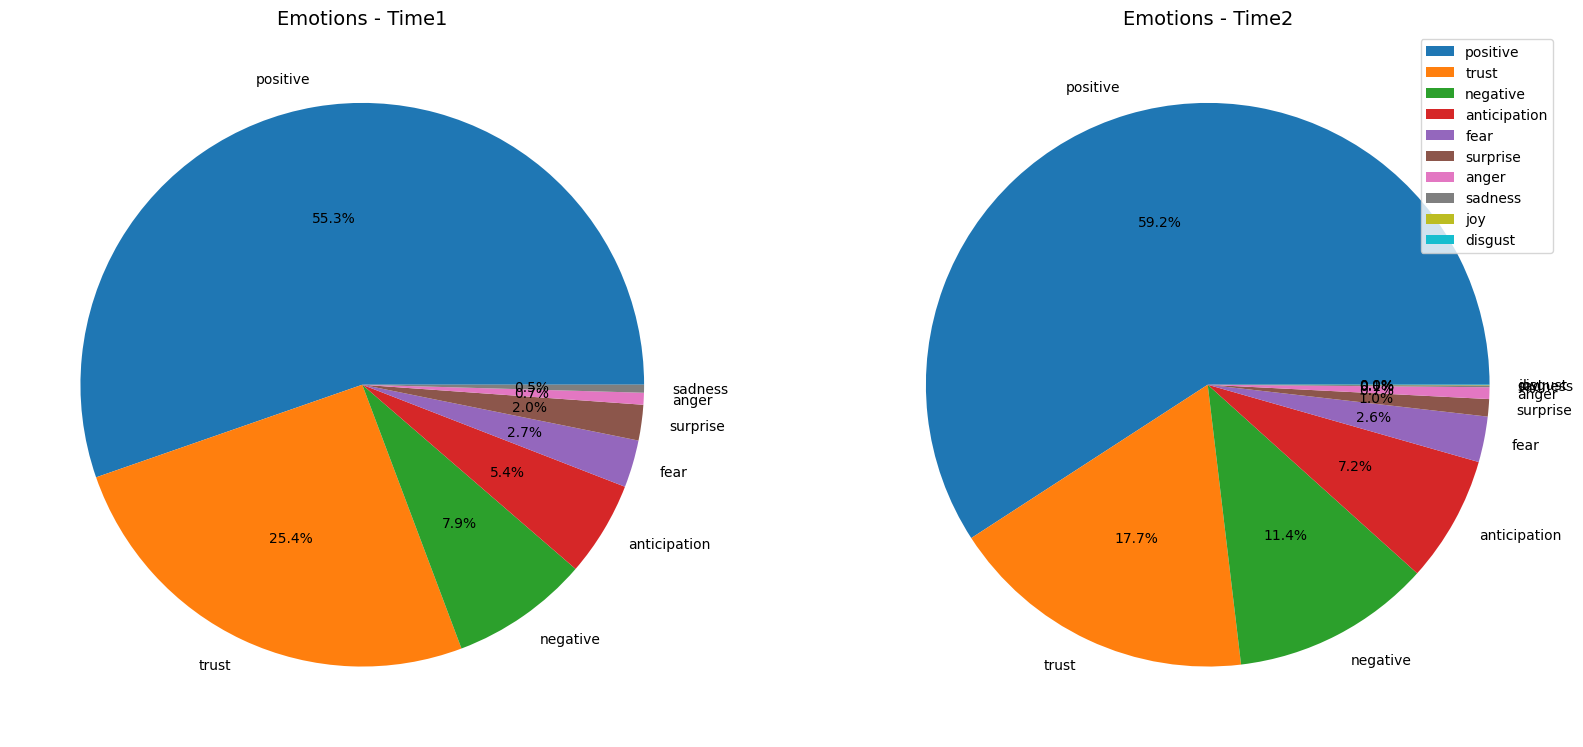

In [27]:
# A pie chart for showing the percentage of every emotion in the text
labels_time1 = emotion_chart_time1.index.tolist()
labels_time2 = emotion_chart_time2.index.tolist()

fig, axs=plt.subplots(1,2,figsize=(20,10))

axs[0].pie(emotion_chart_time1['count'].values, labels = labels_time1 , autopct = '%1.1f%%',labeldistance= 1.1)
axs[0].set_title('Emotions - Time1', fontsize=14)

axs[1].pie(emotion_chart_time2['count'].values, labels = labels_time2 , autopct = '%1.1f%%',labeldistance= 1.1)
axs[1].set_title('Emotions - Time2', fontsize=14)

plt.legend(loc = 'upper right')
plt.show()

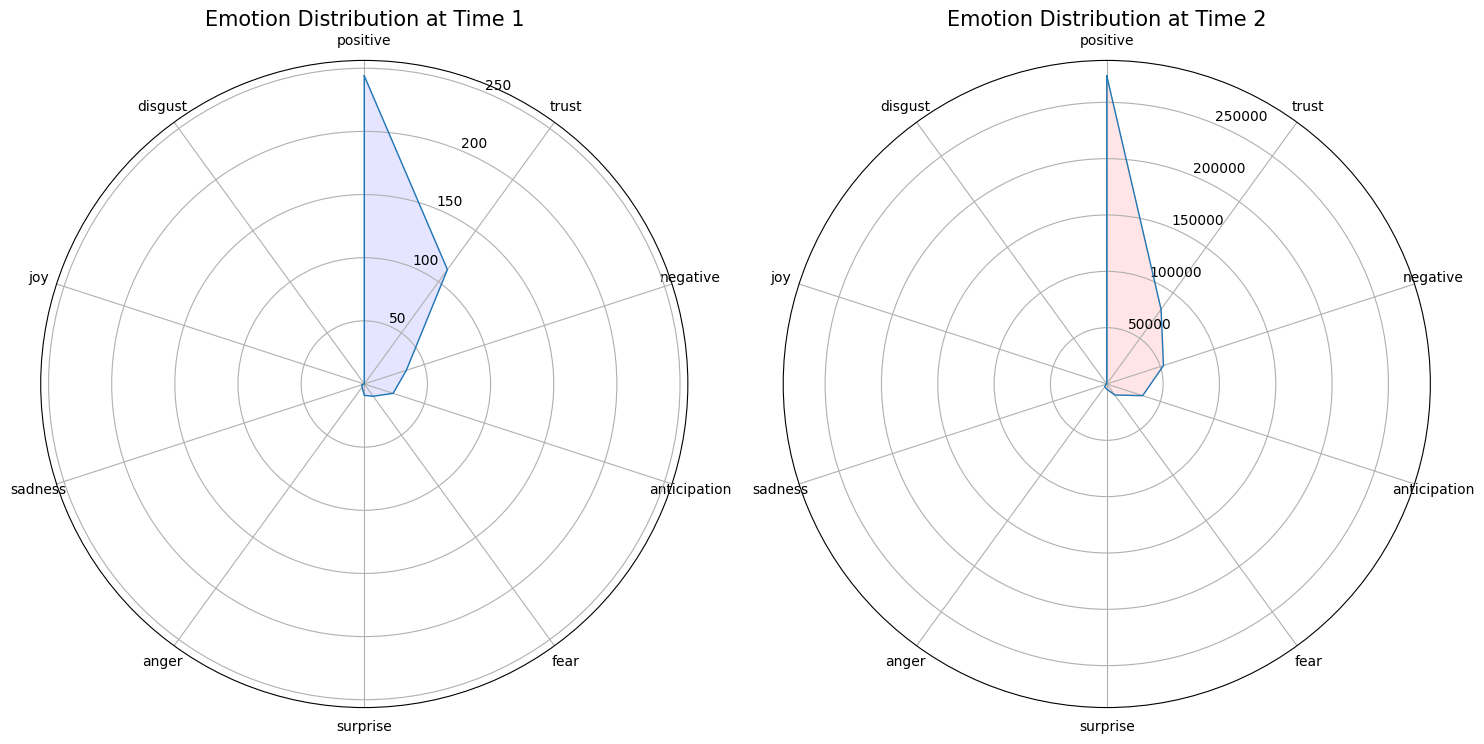

In [50]:
# Radar chart for the emotions
from math import pi

# Ensure all necessary emotions are in the dataframe
new_emotions = ['joy', 'disgust']
for emotion in new_emotions:
    if emotion not in emotion_chart_time1.index:
        emotion_chart_time1.loc[emotion] = [0]
    if emotion not in emotion_chart_time2.index:
        emotion_chart_time2.loc[emotion] = [0]

all_emotions = emotion_chart_time1.index.union(emotion_chart_time2.index)

# Prepare data for the radar charts
values1 = emotion_chart_time1.reindex(all_emotions, fill_value=0)['count'].tolist() + emotion_chart_time1.reindex(all_emotions, fill_value=0)['count'].tolist()[:1]
values2 = emotion_chart_time2.reindex(all_emotions, fill_value=0)['count'].tolist() + emotion_chart_time2.reindex(all_emotions, fill_value=0)['count'].tolist()[:1]
angles = [n / float(len(all_emotions)) * 2 * pi for n in range(len(all_emotions) + 1)]

# Set up the subplot configuration for both radar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(polar=True))
for ax, values, title, color in zip(axes, [values1, values2], ['Time 1', 'Time 2'], ['blue', 'red']):
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=title)
    ax.fill(angles, values, color=color, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(all_emotions)
    ax.set_title(f'Emotion Distribution at {title}', size=15)

fig.tight_layout()  # Adjust layout to make room for the plots
plt.show()

